In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import linear_model
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

In [3]:
mntrain = pd.read_csv('../input/mnist-60000-hand-written-number-images/mnist_train.csv')

Xtrain_all = np.asarray(mntrain.iloc[:, 1:])
ytrain_all = np.array(mntrain.iloc[:, 0])

In [4]:
mntest = pd.read_csv('../input/mnist-60000-hand-written-number-images/mnist_test.csv')

Xtest_all = np.asarray(mntest.iloc[:, 1:])
Ytest_all = np.array(mntest.iloc[:, 0])

In [5]:
print('the shape of train {}'.format(mntrain.shape))
print('the shape of test {}'.format(mntest.shape))

the shape of train (59999, 785)
the shape of test (9999, 785)


In [6]:
mntrain.head()

,5,0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,...,0.608,0.609,0.610,0.611,0.612,0.613,0.614,0.615,0.616,0.617
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [7]:
mntest.head()

,7,0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,...,0.658,0.659,0.660,0.661,0.662,0.663,0.664,0.665,0.666,0.667
0,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [9]:
def extract_data(df, classes):
    X = np.asarray(df.iloc[:, 1:]) / 255.0
    y = np.asarray(df.iloc[:, 0])

    y_res_id = np.array([])
    for i in classes[0]:
        y_res_id = np.hstack((y_res_id, np.where(y == i)[0]))
    n0 = len(y_res_id)

    for i in classes[1]:
        y_res_id = np.hstack((y_res_id, np.where(y == i)[0]))
    n1 = len(y_res_id) - n0 
    
    y_res_id = y_res_id.astype(int)
    X_res = X[y_res_id, :]
    y_res = np.asarray([0]*n0 + [1]*n1)
    return (X_res, y_res)

cls = [[0], [4]]
# extract data for training 
(X_train, y_train) = extract_data(mntrain, cls)

# extract data for test 
(X_test, y_test) = extract_data(mntest, cls)

In [10]:
# Train the logistic regression model
logreg = LogisticRegression(C=1e5, max_iter=1000)
logreg.fit(X_train, y_train)

# Predict
y_pred = logreg.predict(X_test)
print("Accuracy: %.2f %%" % (100 * accuracy_score(y_test, y_pred)))

Accuracy: 99.54 %


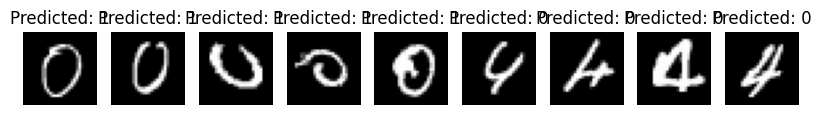

In [11]:
# Display misclassified image(s)
mis = np.where((y_pred - y_test) != 0)[0]
Xmis = X_test[mis, :]

plt.figure(figsize=(10, 5))
for i in range(len(mis)):
    plt.subplot(1, len(mis), i+1)
    plt.imshow(Xmis[i].reshape(28, 28), cmap='gray')
    plt.axis('off')
    plt.title('Predicted: %d' % y_pred[mis[i]])

plt.show()